In [1]:
''' notebook to work on the geometry encoding of the image
will have to create a basic geometry encoder based on the signed distance field 
So what is the idea? do we start from a signed distance field? or do we start from the segmentation and have 
a 2 stage process?
'''

'\xa0notebook to work on the geometry encoding of the image\nwill have to create a basic geometry encoder based on the signed distance field \nSo what is the idea? do we start from a signed distance field? or do we start from the segmentation and have \na 2 stage process?\n'

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import os, yaml, torch
from torch.nn import MSELoss, L1Loss, CosineSimilarity
from torch.utils.data import DataLoader
from copy import deepcopy 
from matplotlib.colors import Normalize
import matplotlib as mpl
curdir = os.getcwd()
os.chdir('..')
from data.data_generation import generate_dataset,generate_pipe_flow_dataset, generate_3dstenosis, generate_3daneurysm
os.chdir(curdir)

In [5]:
from copy import deepcopy
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [6]:
model_name = '3daneurysm_3dstenosis_weighted_1_1_1back_scheduler099_sparsity500_transforms_aug1_mse_latent60_noise10_continued' #
# loading the model config
with open(f"flow_trainings/flow_config_models/{model_name}.yml") as file:
    config = yaml.safe_load(file)
checkpoint = torch.load(f'flow_trainings/flow_saved_models/{model_name}')

In [7]:
from train_flow_submodule import PoseuilleFlow
nvox=64
# # volume size
# nvox = config["nvox"]
# nsamples = 10
# multthickness = config["multthickness"]
# multpositions = config["multpositions"]
# multangles = config["multangles"]
# flows_in_z = config["flows_in_z"]

# # datasets
# gen_channel = config["gen_channel"]
# gen_pipe = config["gen_pipe"]
# assert gen_channel or gen_pipe, 'You should at least generate channel flows or pipe flows.'

# if gen_channel:
#     flows, segmentation_maps, _, velocity_scale_for_norm_channel = generate_dataset(
#         nsamples=nsamples, 
#         nvox=nvox, 
#         xmin=0, 
#         xmax=10, 
#         ymin=0, 
#         ymax=10, 
#         sdf=False,
#         flows_in_z = flows_in_z,
#         multthickness = multthickness,
#         multpositions = multpositions,
#         multangles = multangles
#     )

# if gen_pipe:
#     flows_pipe, segmentation_maps_pipe, _, velocity_scale_for_norm_pipe = generate_pipe_flow_dataset(
#         nsamples=nsamples,
#         nvox=nvox, 
#         xmin=0, 
#         xmax=10, 
#         ymin=0, 
#         ymax=10, 
#         sdf=False,
#         multthickness = multthickness,
#         multpositions = multpositions,
#         multangles = multangles
#     )

/notebooks/superresolution


In [8]:
# main_flows=deepcopy(flows)

In [9]:
# flows = main_flows

In [10]:
# if gen_channel and gen_pipe:
#     # concatenate vel_scales, maps
#     segmentation_maps = np.concatenate((segmentation_maps, segmentation_maps_pipe), axis=0)
#     del segmentation_maps_pipe

#     try:
#         velocity_scale_for_norm = checkpoint["velocity_scale_for_norm"]
#         flows_pipe = flows_pipe * velocity_scale_for_norm_pipe / velocity_scale_for_norm
#         flows = flows * velocity_scale_for_norm_channel / velocity_scale_for_norm
#         print("Loaded training normalization velocity scale.")
#     except:
#         # normalize all the flows together
#         if velocity_scale_for_norm_channel >= velocity_scale_for_norm_pipe:
#             flows_pipe = flows_pipe * velocity_scale_for_norm_pipe / velocity_scale_for_norm_channel
#             velocity_scale_for_norm = velocity_scale_for_norm_channel
#         else:
#             flows = flows * velocity_scale_for_norm_channel / velocity_scale_for_norm_pipe
#             velocity_scale_for_norm = velocity_scale_for_norm_pipe

#     # concatenate flows, maps
#     flows = np.concatenate((flows, flows_pipe), axis=0)
#     del flows_pipe

# # just channel flows
# elif gen_channel:
#     try:
#         velocity_scale_for_norm = checkpoint["velocity_scale_for_norm"]
#         flows = flows * velocity_scale_for_norm_channel / velocity_scale_for_norm
#         print("Loaded training normalization velocity scale.")
#     except:
#         velocity_scale_for_norm = velocity_scale_for_norm_channel

# # just pipe flows
# else:
#     try:
#         print('pipe flows')
#         velocity_scale_for_norm = checkpoint["velocity_scale_for_norm"]
#         flows = flows_pipe * velocity_scale_for_norm_pipe / velocity_scale_for_norm
#         segmentation_maps = segmentation_maps_pipe
#         del flows_pipe
#         print("Loaded training normalization velocity scale.")
#     except Exception as e:
#         print(e)
#         flows = flows_pipe 
#         segmentation_maps = segmentation_maps_pipe
#         velocity_scale_for_norm = velocity_scale_for_norm_pipe

In [11]:
# complex_flows = np.fft.fftn(flows)

# std_complex=3000
# real_noise = np.random.normal(loc=0.0, scale=std_complex, size=flows.shape)
# complex_flows += real_noise
# del real_noise

# imag_noise = np.random.normal(loc=0.0, scale=std_complex, size=flows.shape)
# complex_flows += 1j*imag_noise
# del imag_noise

# flows = np.real(np.fft.ifftn(complex_flows))

In [12]:
# # generate stenosis
# flows, segmentation_maps, _, velocity_scale_for_norm_eval = generate_3daneurysm(
#     nvox=64, 
#     sdf=False, 
#     transforms=True, 
#     data_aug=1, 
#     mode="eval"
# )

# velocity_scale_for_norm = checkpoint["velocity_scale_for_norm"]
# flows = flows * velocity_scale_for_norm_eval / velocity_scale_for_norm

In [13]:
# datasets
gen_stenosis = config["gen_stenosis"]
gen_aneurysm = config["gen_aneurysm"]
assert gen_stenosis or gen_aneurysm, 'You should at least generate stenosis flows or aneurysm flows.'

# augmentation
transforms = False #config["transforms"]
data_aug = config["data_aug"]

if gen_stenosis:
    flows, segmentation_maps, _, velocity_scale_for_norm_stenosis = generate_3dstenosis(
        nvox=64, 
        sdf=False, 
        transforms=transforms,
        data_aug=data_aug,
        mode="eval"
    )

if gen_aneurysm:
    flows_aneurysm, segmentation_maps_aneurysm, _, velocity_scale_for_norm_aneurysm = generate_3daneurysm(
        nvox=64, 
        sdf=False, 
        transforms=transforms,
        data_aug=data_aug,
        mode="eval"
    )

if gen_stenosis and gen_aneurysm:
    # concatenate vel_scales, maps
    segmentation_maps = np.concatenate((segmentation_maps, segmentation_maps_aneurysm), axis=0)
    del segmentation_maps_aneurysm

    # normalize all the flows together
    if velocity_scale_for_norm_stenosis >= velocity_scale_for_norm_aneurysm:
        flows_aneurysm = flows_aneurysm * velocity_scale_for_norm_aneurysm / velocity_scale_for_norm_stenosis
        velocity_scale_for_norm = velocity_scale_for_norm_stenosis
    else:
        flows = flows * velocity_scale_for_norm_stenosis / velocity_scale_for_norm_aneursym
        velocity_scale_for_norm = velocity_scale_for_norm_aneurysm

    # concatenate flows, maps
    flows = np.concatenate((flows, flows_aneurysm), axis=0)
    del flows_aneurysm

# just channel flows
elif gen_stenosis:
    velocity_scale_for_norm = velocity_scale_for_norm_stenosis

# just pipe flows
else:
    flows = flows_aneurysm
    segmentation_maps = segmentation_maps_aneurysm
    velocity_scale_for_norm = velocity_scale_for_norm_aneurysm


Normalizing samples.
Creating segmentation maps.
Adding edges.
Created edges.
Add edges on the side.
Normalizing samples.
Creating segmentation maps.
Adding edges.
Created edges.
Add edges on the side.


In [14]:
flows=flows*velocity_scale_for_norm/34.6839153

In [15]:
noiseless_flows = deepcopy(flows)

In [16]:
# downscale and upscale the flows
def downscale_3D_torch(arr, scale_factor=1/4): #4.65
    B, _, N, _, _ = arr.shape
    downscaled_arr = torch.nn.functional.interpolate(arr, scale_factor=scale_factor, mode='trilinear', align_corners=True)
    return downscaled_arr

def upscale_3D_torch(arr, output_size):
    upscaled_arr = torch.nn.functional.interpolate(arr, size=output_size, mode='trilinear', align_corners=True)
    return upscaled_arr

low_res = False
if low_res:
    # assume arr is your numpy array
    flows = torch.from_numpy(noiseless_flows).float() # convert numpy array to pytorch tensor
    flows = downscale_3D_torch(flows, scale_factor=64/64)

    # add noise in low res
    noise = np.random.normal(loc=0.0, scale=config["noise_std"], size=flows.shape)
    flows = flows * (1 + noise)
    plt.imshow(flows[0, 0, :, :, flows.shape[-1]//2], cmap=mpl.colormaps['coolwarm'])
    plt.colorbar()
    flows = upscale_3D_torch(flows, noiseless_flows.shape[2:])
    # convert tensor back to numpy
    flows = flows.numpy()
    flows[noiseless_flows==0] = 0

In [17]:
if not low_res:
    noise = np.random.normal(loc=0.0, scale=config["noise_std"], size=flows.shape)

    # remove noise from no slip boundary
    segmentation_maps_rep = np.repeat(segmentation_maps, 3, axis=1)
    boundaries = segmentation_maps_rep==1
    no_slip = flows==0

    noise[np.logical_and(boundaries, no_slip)] = 0
    noise[segmentation_maps_rep==0]=0

    flows = flows * (1 + noise)

    del boundaries
    del no_slip

In [18]:
eval_flows_hr = True
if eval_flows_hr:
    # ints = [307, 191, 199, 165, 208, 88, 296, 212, 44, 138, 101, 195, 204, 2, 216, 113, 254, 16, 116, 315]
    selected_integers = [147, 165, 189, 133, 215, 222, 136,   7,  12,  39, 254, 173,  18,
        29,  19,   3, 157,   9, 132, 146,  36, 199, 111, 240, 130, 243,
        168,  53, 186,  99, 123,  71, 160, 125,  74, 306, 214, 253, 140,
        13, 282, 291, 230,  89,  57,   6, 247,   0,  94, 181, 284,  25,
        268, 114, 226,  90,  60, 172,  79, 235, 113, 278, 180, 112, 143,
        127, 193,  11, 308, 252, 229,  32,  30, 183, 101, 1,  48, 188,
        158, 283, 145, 264, 117, 227, 166,  77, 142, 231,  21,  63, 195,
        305, 106, 297, 296,  52,  98, 275,  97, 274
    ]
    flows_hr = np.concatenate([
        np.load('../data/3dstenosis/3dstenosis_hr.npy')[selected_integers], 
        np.load('../data/3daneurysm/3daneurysm_hr.npy')[selected_integers]
    ])
    flows_hr /= checkpoint["velocity_scale_for_norm"]

In [19]:
import importlib
specific_model = importlib.import_module(f'flow_trainings.flow_models.{model_name}')
ConvNet = specific_model.ConvNet

In [20]:
# setting device and data types
dtype = torch.float32
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [21]:
# dataloaders
test_dataset = PoseuilleFlow(flows)
batch_size = config["batch_size"]
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
# setup models
model = ConvNet(
    input_size=nvox, 
    channels_in=flows.shape[1], 
    channels_init=config["channels_init"],
    channels_out=config["channels_out"],
    latent_space_size=config["latent_space_size"],
)

In [23]:
checkpoint = torch.load(f"flow_trainings/flow_saved_models/{model_name}", map_location=torch.device("cpu"))
model.load_state_dict(checkpoint["model_state_dict"])
model = model.to(device=device)
model.eval()
# set up losses
loss_function_mae = L1Loss()
loss_function_mse = MSELoss()
loss_function_cosine = CosineSimilarity(dim=1, eps=1e-08)

In [24]:
intermediate_outputs = []
def hook(module, input, output):
    intermediate_outputs.append(output)
model.enc7.register_forward_hook(hook)

In [27]:
epoch_total_loss_mae = 0
epoch_total_loss_mse = 0
epoch_total_loss_cosine = 0
predictions = np.zeros_like(flows)
predictions_hr = np.zeros([
    flows.shape[0], 
    flows.shape[1],
    110,
    110,
    1
])

with torch.no_grad():
    counter = 0

    for i, flow_batch in tqdm(enumerate(test_dataloader)):
        flow_batch = flow_batch.to(device=device, dtype=dtype) # move to device, e.g. GPU
        # =====================forward======================
        # compute latent vectors
        reconstruction = model(flow_batch)
        intermediate_output_tensor = intermediate_outputs[0]
        
        loss_mae = loss_function_mae(reconstruction, flow_batch)
        loss_mse = loss_function_mse(reconstruction, flow_batch)
        loss_cosine = torch.sum(loss_function_cosine(reconstruction, flow_batch))/(flow_batch.shape[0]*(nvox**3))

        predictions[counter:counter+len(flow_batch), ...] = reconstruction.detach().cpu().numpy()
        
        if eval_flows_hr:
            reconstruction_hr = torch.nn.functional.interpolate(reconstruction, size=110, mode='trilinear', align_corners=True)
            predictions_hr[counter:counter+len(flow_batch), ...] = reconstruction_hr[..., 55:56].detach().cpu().numpy()
        counter += len(flow_batch)

        # update write iteration loss
        epoch_total_loss_mae += (loss_mae.item()*flow_batch.shape[0])
        epoch_total_loss_mse += (loss_mse.item()*flow_batch.shape[0])
        epoch_total_loss_cosine += (loss_cosine.item()*flow_batch.shape[0])

print(
    f"mae: {epoch_total_loss_mae/(len(test_dataset)):.2e}, ",
    f"mse: {epoch_total_loss_mse/(len(test_dataset)):.2e}, ",
    f"cosine: {epoch_total_loss_cosine/(len(test_dataset)):.2e}, ",
)

0it [00:00, ?it/s]

mae: 1.88e-03,  mse: 2.92e-04,  cosine: 3.61e-02, 


In [28]:
reconstructions = deepcopy(predictions)
flows_for_viz = deepcopy(flows)
noiseless_flows_for_viz = deepcopy(noiseless_flows)

mask = (segmentation_maps != 2).squeeze()
# Modify the selected values in place using masked_fill_()
reconstructions[:, 0, ...][mask]= np.nan #0
reconstructions[:, 1, ...][mask]= np.nan #0
reconstructions[:, 2, ...][mask]= np.nan #0

noiseless_flows_for_viz[:, 0, ...][mask]= np.nan #0
noiseless_flows_for_viz[:, 1, ...][mask]= np.nan #0
noiseless_flows_for_viz[:, 2, ...][mask]= np.nan #0

flows_for_viz[:, 0, ...][mask]= np.nan #0
flows_for_viz[:, 1, ...][mask]= np.nan #0
flows_for_viz[:, 2, ...][mask]= np.nan #0


In [29]:
print(np.nanmean(np.square(noiseless_flows_for_viz-reconstructions)))
print(np.sqrt(np.nanmean(np.square(noiseless_flows_for_viz-reconstructions))))

0.0003905046951775268
0.019761191643661746


In [30]:
10*np.log10(1/np.nanmean(np.square(noiseless_flows_for_viz-reconstructions)))

34.08373740077505

In [31]:
predictions_hr_for_viz = deepcopy(predictions_hr)
flows_hr_for_viz = deepcopy(flows_hr)[:, :3, :, :, 0:1]

mask = np.linalg.norm(flows_hr[:, :3, :, :, 0:1], axis=1, keepdims=True)==0
predictions_hr_for_viz[np.repeat(mask, 3, axis=1)] = np.nan
flows_hr_for_viz[np.repeat(mask, 3, axis=1)] = np.nan

In [32]:
print(np.nanmean(np.square(flows_hr_for_viz-predictions_hr_for_viz)))
print(np.sqrt(np.nanmean(np.square(flows_hr_for_viz-predictions_hr_for_viz))))

0.0004649630243994725
0.021563001284595623


In [33]:
10*np.log10(1/np.nanmean(np.square(flows_hr_for_viz-predictions_hr_for_viz)))

33.32581582460079

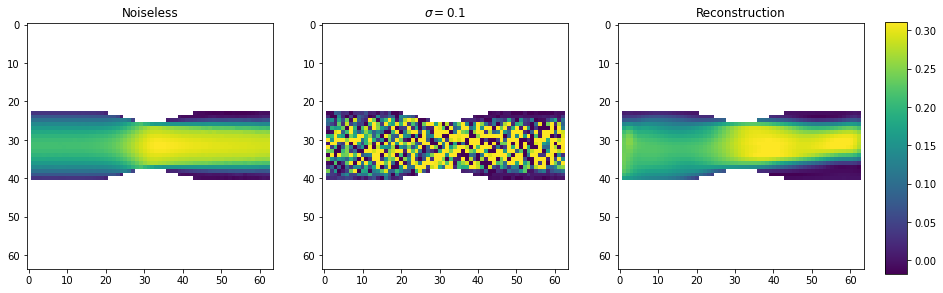

In [126]:
i = 1
vel_comp = 1
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
im0 = ax[0].imshow(noiseless_flows_for_viz[i, vel_comp, :, :, 30])
ax[0].set_title('Noiseless')
im1 = ax[1].imshow(flows_for_viz[i, vel_comp, :, :, 30])
ax[1].set_title(r'$\sigma = 1.0$')
im2 = ax[2].imshow(reconstructions[i, vel_comp, :, :, 30])
ax[2].set_title('Reconstruction')
# im3 = ax[3].imshow(np.abs(noiseless_flows[i, vel_comp, :, :, 30] - reconstructions[i, vel_comp, :, :, 30]))
# ax[3].set_title('Absolute Error')
# im3 = ax[2].imshow(noiseless_flows[i, vel_comp, :, :, 15])
# ax[2].set_title('Noiseless')

#  Get the minimum and maximum values across both datasets
vmin_recon = im0.get_array().min()
vmax_recon = im0.get_array().max()

# Normalize the colormap based on the shared min and max values
norm_recon = Normalize(vmin=vmin_recon, vmax=vmax_recon)

im0.set_norm(norm_recon)
im1.set_norm(norm_recon)
im2.set_norm(norm_recon)

# add a colorbar to the right of the plot
cbar_ax = fig.add_axes([0.92, 0.325, 0.02, 0.35]) # [left, bottom, width, height]
cbar = plt.colorbar(im2, cax=cbar_ax)

plt.show()

(-1.1, 1.1, 0.0, 1000000.0)

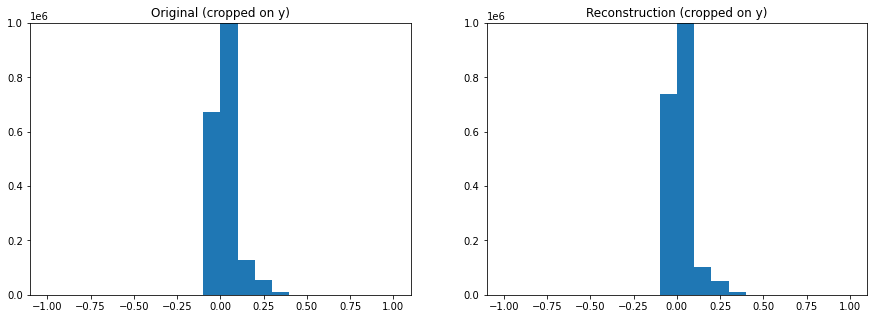

In [127]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
bins, ranges = 20, (-1,1)
ymin, ymax = 0, 1000000
# im1 = ax[0].hist(flows[:, [0,1,2], ...].flatten(), bins=bins, range=ranges)
im1 = ax[0].hist(noiseless_flows[:, [0,1,2], ...][np.abs(flows)>0], bins=bins, range=ranges)
ax[0].set_title('Original (cropped on y)')
ax[0].axis(ymin=ymin, ymax=ymax)
# im2 = ax[1].hist(reconstructions[:, [0,1,2], ...].flatten(), bins=bins, range=ranges)
im2 = ax[1].hist(reconstructions[:, [0,1,2]][np.abs(flows)>0], bins=bins, range=ranges)
ax[1].set_title('Reconstruction (cropped on y)')
ax[1].axis(ymin=ymin, ymax=ymax)

In [36]:
# will look into different losses
# l1, l2, the one I read on with the angles
# cosine loss --> alignment of the vector at each point

In [37]:
np.median(np.abs(flows[:, [0]][segmentation_maps==2]))

0.021840870054522968

In [38]:
np.mean(flows**2, axis=(0, 2, 3, 4))

array([7.92497019e-04, 7.65471699e-04, 5.18188907e-06])

In [39]:
np.mean(np.abs(noiseless_flows-reconstructions), axis=(0, 2, 3, 4))

array([nan, nan, nan])

In [40]:
if config["noisy"]:
    np.mean(np.abs(noise), axis=(0, 2, 3, 4))

In [41]:
 np.median(np.abs(flows)[flows>0])

0.008134481085320756

In [42]:
velocity_scale_for_norm

array([[[[[15.73463702]]]]])

Text(0.5, 0, 'x')

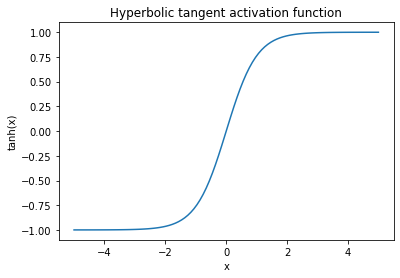

In [92]:
xs = np.linspace(-5, 5, 100)
tanhs = np.tanh(xs)
plt.plot(xs, tanhs)
plt.title('Hyperbolic tangent activation function')
plt.ylabel('tanh(x)')
plt.xlabel('x')

Text(0.5, 0, 'x')

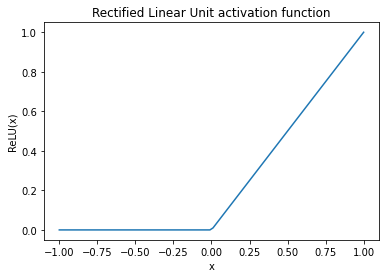

In [94]:
xs0 = np.linspace(-1, 1, 100)
relus = deepcopy(xs0)
relus[relus<0]=0
plt.plot(xs0, relus)
plt.title('Rectified Linear Unit activation function')
plt.ylabel('ReLU(x)')
plt.xlabel('x')